In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
csv = pd.read_csv('../data/measurements.csv')

In [71]:
csv

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [72]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [73]:
columns_to_clean = ['distance', 'consume', 'temp_inside']

In [74]:
for column in columns_to_clean:

    csv[column] = csv[column].str.replace(',', '.').astype('float32')

csv.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [95]:
csv = csv.drop(columns=['refill gas', 'refill liters', 'specials'])

In [96]:
csv.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652834,22.667837,1.3,11.80,14.6,19.0,216.100006
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.200000
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.000000
temp_inside,376.0,21.929522,1.010455,19.0,21.50,22.0,22.5,25.500000
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.000000
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.000000
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.000000
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.000000


In [97]:
csv[(csv.consume == csv.consume.max()) | (csv.consume == csv.consume.min())]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
44,5.4,3.3,32,21.5,7,SP98,0,0,0
61,2.1,12.2,23,21.5,9,SP98,1,1,0


In [98]:
corr = csv.corr(numeric_only=True)
corr

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.075305,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.161991,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.059725,0.015411,-0.035408,0.009489,0.081618
temp_inside,0.075305,-0.161991,0.059725,1.000000,0.361308,0.297775,-0.037356,0.246120
temp_outside,0.088175,-0.320811,0.015411,0.361308,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.297775,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.037356,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.246120,0.346903,0.088598,-0.112650,1.000000


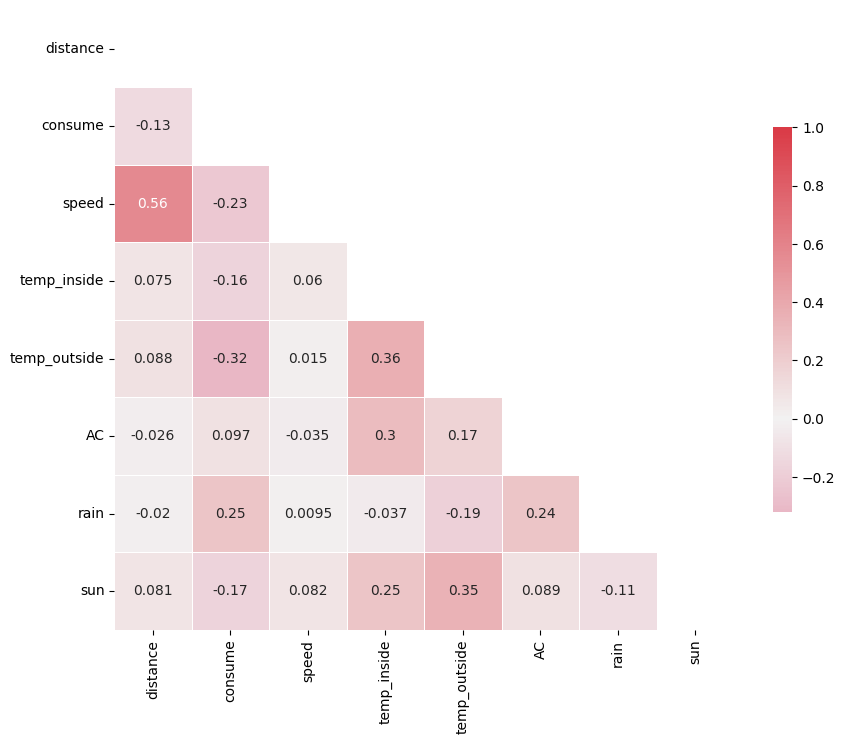

In [99]:
fig, ax=plt.subplots(figsize=(10,10))


mask=np.triu(np.ones_like(corr, dtype=bool))           # mask for superior triangular matrix


color_map=sns.diverging_palette(0, 10, as_cmap=True)   # color palette


# correlation heatmap
sns.heatmap(corr,                       # data
            mask=mask,                  # white mask
            cmap=color_map,             # color
            vmax=1,                     # vertical edge
            center=0,                   # plot center
            square=True,                # data square representation
            annot=True,
            linewidth=.5,               # linewidth
            cbar_kws={'shrink': .5},    # lateral bar legend
            ax=ax                       # axes for plot size
           );